Based on the rate of consumption emissions, territorial emissions, fossil fuel type and the global carbon project, estimate the predicted annual temperature of the Philippines in 2050.

NOTES:

1. On the spikes, point out the events that caused the spike like the 1998 PH drought, the World War 2 in 1944-1945, El Niño/La Nina phenomenons.
2. Add the number of typhoons that entered the Philippines.
3. Agricultural output and Annual GDP
4. Oil export and consumption
5. Population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
rainfall_ph = pd.read_csv("../data/worldbank/pr_1901_2016_PHL.csv")
temperature_ph = pd.read_csv("../data/worldbank/tas_1901_2016_PHL.csv")
temperature_global_annual = pd.read_csv("../data/datahub.io/global-temp/data/annual_csv.csv")

consumption_emissions = pd.read_csv("../data/global-carbon-project/consumption-emissions.csv")
territorial_emissions = pd.read_csv("../data/global-carbon-project/territorial-emissions.csv")
fossil_fuel_type = pd.read_csv("../data/global-carbon-project/fossil-fuel-type.csv")
global_carbon_project = pd.read_csv("../data/global-carbon-project/global-carbon-budget.csv")
worldbank_data = pd.read_csv("../data/worldbank/worldbank_ph_fr1960.csv")

In [3]:
wb_data = worldbank_data[worldbank_data['Country Code'] == 'PHL']\
    .drop(columns=['Country Name', 'Country Code', 'Indicator Name'])\
    .pivot_table(columns='Indicator Code')\
    .reset_index()\
    .rename(columns={'index': 'Year'})\
    .iloc[:-1]

wb_data['Year'] = wb_data['Year'].astype(int)

In [5]:
from_year = 1910
to_year = 2016

tmph_mean_per_year = temperature_ph[(temperature_ph['year'] >= from_year) & (temperature_ph['year'] <= to_year)]\
    .groupby(temperature_ph['year'])[['year', 'temperature_celsius']]\
    .transform('mean')\
    .drop_duplicates()

rfph_mean_per_year = rainfall_ph[(rainfall_ph['year'] >= from_year) & (rainfall_ph['year'] <= to_year)]\
    .groupby(rainfall_ph['year'])[['year', 'rainfall_mm']]\
    .transform('mean')\
    .drop_duplicates()

ph_data = pd.DataFrame(tmph_mean_per_year)
ph_data['rainfall_mm'] = rfph_mean_per_year['rainfall_mm']
ph_data = ph_data.reset_index()\
    .drop(columns='index')\
    .merge(consumption_emissions[['Year', 'Philippines']], how='left', left_on='year', right_on='Year')\
    .drop(axis=0, columns=['Year'])\
    .rename(columns={'Philippines': 'consumption_emissions'})\
    .merge(territorial_emissions[['Year', 'Philippines']], how='left', left_on='year', right_on='Year')\
    .drop(axis=0, columns=['Year'])\
    .rename(columns={'Philippines': 'territorial_emissions'})\
    .merge(wb_data, how='left', left_on='year', right_on='Year')\
    .drop(axis=0, columns=['Year'])\
    .rename(columns={'SP.POP.TOTL':'population'})

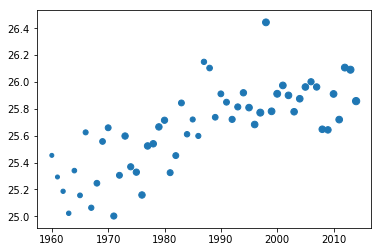

In [18]:
# temp_c, CO2 emissions (kt)
plt.scatter(ph_data['year'], ph_data['temperature_celsius'], s=ph_data['EN.ATM.CO2E.PC'] * 50)

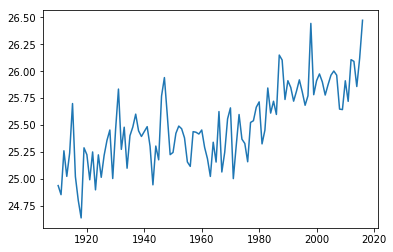

In [27]:
plt.plot(ph_data['year'], ph_data['temperature_celsius'])

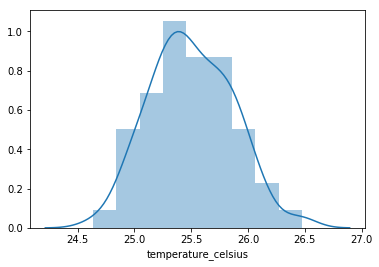

In [8]:
sns.distplot(ph_data['temperature_celsius'][ph_data['year'] >= 1910])

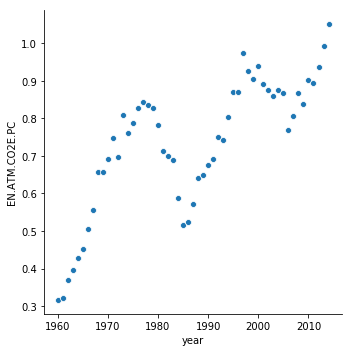

In [28]:
sns.relplot(x='year', y='EN.ATM.CO2E.PC', data=ph_data)